# MAp: Mutation Accumulation (in plasmids)



In the simulation notebook, we run multiple simulations with varying parameters and store the results in PKL files. This notebook focuses on generating the data needed for our analysis. By running simulations separately, we can easily scale up our experiments and manage large datasets without overloading a single notebook.

The results of each simulation are stored in PKL files, named according to the parameters used in the simulation (e.g., number of days, number of generations, mutation rate, and maximum plasmid copy number). This naming convention helps in organizing and retrieving specific simulation results for analysis.

In this notebook, we load the data obtained from the simulation notebook and perform detailed analyses and visualizations. This notebook focuses on interpreting the simulation results and gaining insights into plasmid dynamics under different conditions.



In [1]:
import copy
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import os
from collections import Counter
import time
import pickle
from scipy.optimize import curve_fit
import datetime
import sys
from google.colab import drive

### User-defined parameters

In [2]:

# Define the base path to the shared project directory
base_path = '/content/drive/MyDrive/SYNC_Projects/MAp/'
expe='sim_dev_18e-7/'

# num_generations: number of generations in the simulation
num_generations = 24

# num_reps: number of replicate simulations to run for each parameter value
num_reps = 500

# mut_rate: mutation rate per plasmid per generation
mut_rate = 18e-7

# num_days: number of days of simulated bacterial growth
num_days = 60

# maxexpe: maximum number of simulations before aborting
maxexpe = 1e6

# max_plasmids: a list of maximum plasmid copy numbers to simulate
max_plasmids = [ 1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100] #
#max_plasmids = [1, 10, 50, 100]

### Connect with Google Drive

In [3]:

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Define relative paths from the base path
pathDATA = os.path.join(base_path, 'data/')
pathSIM = os.path.join(base_path, 'code/py-MAp/runs/')
pathCODE = os.path.join(base_path, 'code/py-MAp/')
sys.path.append(os.path.join(pathCODE))

# Verify paths and imported data
print("pathDATA:", pathDATA)
print("pathSIM:", pathSIM)
print("pathCODE:", pathCODE)

# Import functions
import MAp

Mounted at /content/drive
pathDATA: /content/drive/MyDrive/SYNC_Projects/MAp/data/
pathSIM: /content/drive/MyDrive/SYNC_Projects/MAp/code/py-MAp/runs/
pathCODE: /content/drive/MyDrive/SYNC_Projects/MAp/code/py-MAp/


In [4]:
dirSIM=pathSIM+expe
#dirSIM='run' #uncomment to save data in new directory

if not os.path.exists(dirSIM):
  if not dirSIM:
    dt = datetime.now()
    now=dt.strftime("%H%M%S%f") #ID: Timestamp
    dirSIM=pathSIM+'_sim_%s/'%(now)

  os.mkdir(dirSIM)
  os.mkdir(dirSIM+'data/')
  os.mkdir(dirSIM+'figures/')
  print('mkdir '+dirSIM)

#### Loading Simulation Data

We use the following function to load the simulation results from the PKL files:

In [5]:

def loadExperiment(this_max_plasmids, verbose=False):

    filePKL_expe=dirSIM+'data/MAp_days'+str(num_days)+'_gens'+str(num_generations)+'_mut'+str(mut_rate)+'_maxp'+str(this_max_plasmids)+'.pkl'
    # Check if experiment_results.pkl exists
    if os.path.exists(filePKL_expe):
        # Load experiment_results from the .pkl file
        with open(filePKL_expe, 'rb') as f:
            experiment_results = pickle.load(f)
            print('Loaded: %s'%filePKL_expe)
            return experiment_results
    else:
      print('Not found: %s'%filePKL_expe)

    return experiment_results


sim_results=[]
if True: #False: #To run, or not to run
  for this_max_plasmids in max_plasmids:
    print("*** max_plasmids=",this_max_plasmids)
    experiment_results=loadExperiment(this_max_plasmids, True)
    #experiment_results=runExperiment(this_max_plasmids, True)
    sim_results.append(experiment_results)


*** max_plasmids= 1
Loaded: /content/drive/MyDrive/SYNC_Projects/MAp/code/py-MAp/runs/sim_dev_18e-7/data/MAp_days60_gens24_mut1.8e-06_maxp1.pkl
*** max_plasmids= 5
Loaded: /content/drive/MyDrive/SYNC_Projects/MAp/code/py-MAp/runs/sim_dev_18e-7/data/MAp_days60_gens24_mut1.8e-06_maxp5.pkl
*** max_plasmids= 10
Loaded: /content/drive/MyDrive/SYNC_Projects/MAp/code/py-MAp/runs/sim_dev_18e-7/data/MAp_days60_gens24_mut1.8e-06_maxp10.pkl
*** max_plasmids= 15
Loaded: /content/drive/MyDrive/SYNC_Projects/MAp/code/py-MAp/runs/sim_dev_18e-7/data/MAp_days60_gens24_mut1.8e-06_maxp15.pkl
*** max_plasmids= 20
Loaded: /content/drive/MyDrive/SYNC_Projects/MAp/code/py-MAp/runs/sim_dev_18e-7/data/MAp_days60_gens24_mut1.8e-06_maxp20.pkl
*** max_plasmids= 25
Loaded: /content/drive/MyDrive/SYNC_Projects/MAp/code/py-MAp/runs/sim_dev_18e-7/data/MAp_days60_gens24_mut1.8e-06_maxp25.pkl
*** max_plasmids= 30
Loaded: /content/drive/MyDrive/SYNC_Projects/MAp/code/py-MAp/runs/sim_dev_18e-7/data/MAp_days60_gens24_mut1

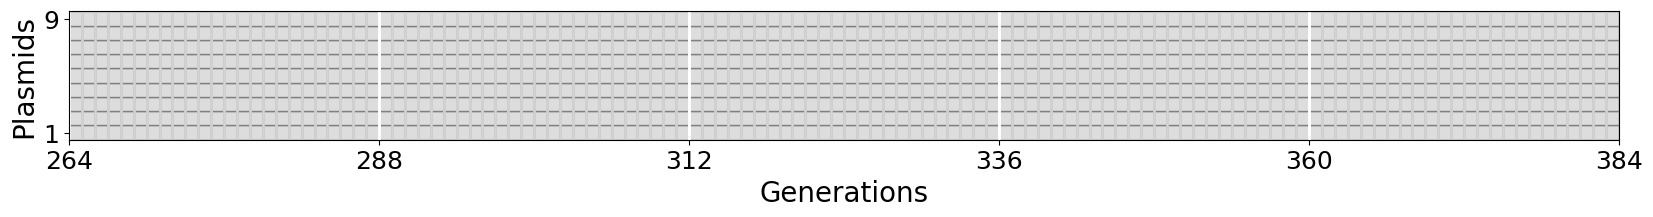

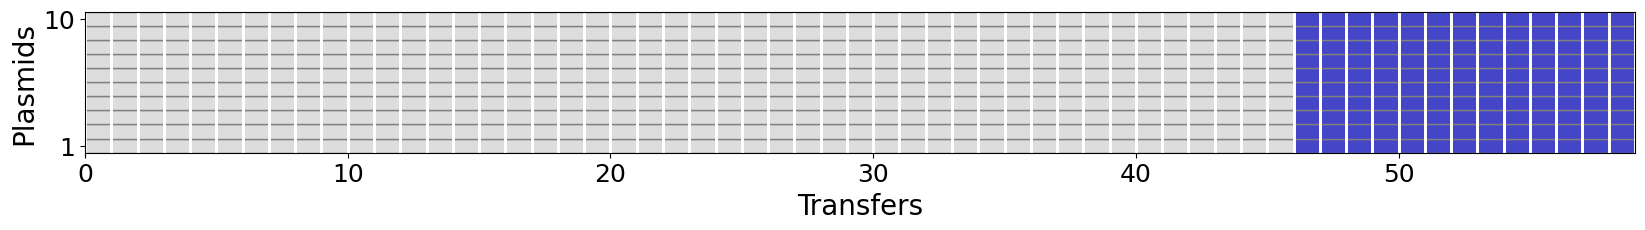

In [6]:

irep=1
this_max_plasmids=10

preSIM='MAp_days'+str(num_days)+'_gens'+str(num_generations)+'_mut'+str(mut_rate)+'_maxp'+str(this_max_plasmids)+'_irep'+str(irep)
#fileSIM = os.path.join('data/', preSIM)
for file in os.listdir(dirSIM+ "data/"):
    if file.startswith(preSIM):
        fileSIM = os.path.join(dirSIM+"data/", file)
        data_plasmids=MAp.importData(fileSIM)
        break


min_days=11
max_days=16
gens=range(num_generations*min_days,num_generations*max_days)
MAp.plotMutGenerations(data_plasmids, gens, this_max_plasmids, num_generations)

days=range(0,60)
MAp.plotMutDays(data_plasmids, days, num_generations)

### Visualization of Final Mutation Frequencies

To visualize the final mutation frequencies, we used a function that calculated the mean mutation frequencies for each plasmid copy number and plotted these frequencies against empirical data and expected mutation rates. The resulting plot compares the mutation frequencies for different plasmid copy numbers:

- **X-Axis**: Plasmid copy number.
- **Y-Axis**: Mutations per generation and locus (logarithmic scale).
- **Data Points**:
  - **Total Mutations (Black Solid Line)**: The overall frequency of mutations accumulated over the simulations.
  - **Fixed Mutations (Black Dotted Line)**: The frequency of mutations that became fixed in the population.
  - **Empirical Data (Cyan Dots)**: Observed mutation frequencies from experimental data.
  - **Expected Mutations (Cyan Dotted Line)**: Theoretical expectations for mutation rates based on model parameters.

This visualization shows the relationship between plasmid copy number and mutation frequency. It highlights how mutations accumulate and become fixed within bacterial populations and allows for comparison with empirical data to validate the model's predictions.

Streaming output truncated to the last 5000 lines.
11 55 1
11 55 2
11 55 3
11 55 4
11 55 5
11 55 6
11 55 7
11 55 8
11 55 9
11 55 10
11 55 11
11 55 12
11 55 13
11 55 14
11 55 15
11 55 16
11 55 17
11 55 18
11 55 19
11 55 20
11 55 21
11 55 22
11 55 23
11 55 24
11 55 25
11 55 26
11 55 27
11 55 28
11 55 29
11 55 30
11 55 31
11 55 32
11 55 33
11 55 34
11 55 35
11 55 36
11 55 37
11 55 38
11 55 39
11 55 40
11 55 41
11 55 42
11 55 43
11 55 44
11 55 45
11 55 46
11 55 47
11 55 48
11 55 49
11 55 50
11 55 51
11 55 52
11 55 53
11 55 54
11 55 55
11 55 56
11 55 57
11 55 58
11 55 59
11 55 60
11 55 61
11 55 62
11 55 63
11 55 64
11 55 65
11 55 66
11 55 67
11 55 68
11 55 69
11 55 70
11 55 71
11 55 72
11 55 73
11 55 74
11 55 75
11 55 76
11 55 77
11 55 78
11 55 79
11 55 80
11 55 81
11 55 82
11 55 83
11 55 84
11 55 85
11 55 86
11 55 87
11 55 88
11 55 89
11 55 90
11 55 91
11 55 92
11 55 93
11 55 94
11 55 95
11 55 96
11 55 97
11 55 98
11 55 99
11 55 100
11 55 101
11 55 102
11 55 103
11 55 104
11 55 105
11 55 1

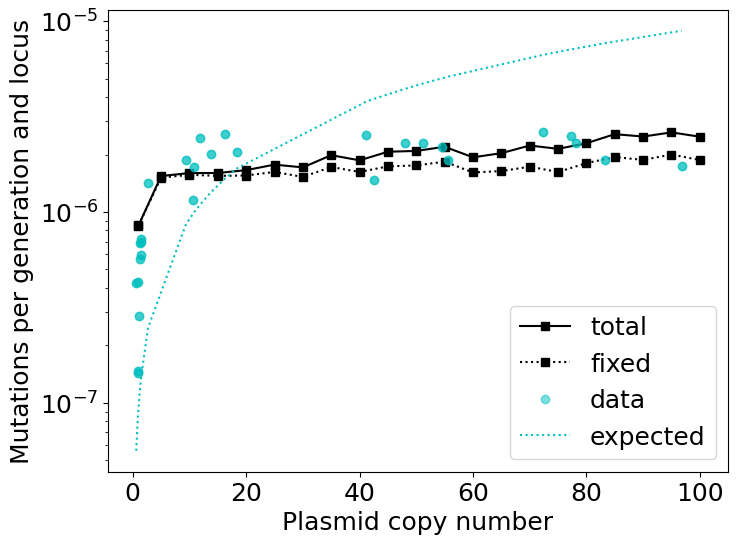

In [7]:
def plotFinalMutations0(this_gens, max_plasmids, sim_results, plotSIM=''):
    """
    Aggregates and visualizes the final mutation frequencies in plasmids across multiple simulations.

    Parameters:
        this_gens: List of generation indices.
        max_plasmids: List of maximum plasmid copy numbers.
        sim_results: List of simulation results.
        plotSIM: Optional; file path to save the plot.
    """

    tot_expe = []
    final_plasmids = []
    final_muts = []
    final_all_muts = []

    for iplasmid, this_max_plasmids in enumerate(max_plasmids):
        tot_generations = num_generations * num_days
        sum_muts = np.zeros((1, tot_generations))
        sum_fixed_muts = np.zeros((1, tot_generations))
        sum_new_muts = np.zeros((1, tot_generations))
        sum_ht_muts = np.zeros((1, tot_generations))
        sum_lost_muts = np.zeros((1, tot_generations))
        cum_new_muts = np.zeros((1, tot_generations))
        cum_lost_muts = np.zeros((1, tot_generations))

        nexpe = 0
        for irep in range(0, num_reps):
            print(iplasmid, this_max_plasmids, irep)
            # Aggregate results from each replicate
            sum_muts += np.array(sim_results[iplasmid][irep]['rep_count_muts'])
            sum_fixed_muts += np.array(sim_results[iplasmid][irep]['rep_count_fixed_muts'])
            sum_ht_muts = sum_muts - sum_fixed_muts
            sum_new_muts += np.hstack([0, sim_results[iplasmid][irep]['rep_count_new_muts']])
            cum_new_muts += np.hstack([0, sim_results[iplasmid][irep]['rep_cum_new_muts']])
            sum_lost_muts += np.hstack([0, sim_results[iplasmid][irep]['rep_count_lost_muts']])
            cum_lost_muts += np.hstack([0, sim_results[iplasmid][irep]['rep_cum_lost_muts']])
            nexpe += sim_results[iplasmid][irep]['nexpe']
            freq_muts = sum_muts[0][-1]  # Frequency of mutations
            freq_all_muts = cum_new_muts[0][-1]  # Frequency of all mutations

            final_plasmids.append(this_max_plasmids)
            final_muts.append(freq_muts)
            final_all_muts.append(freq_all_muts)

        tot_expe.append(np.sum(nexpe))

    plt.rcParams.update({'font.size': 18})
    plt.rcParams['axes.facecolor'] = 'white'
    plt.rcParams['savefig.facecolor'] = 'white'
    fig, ax = plt.subplots(figsize=(8, 6))

    # Plot replicates for mutation frequency
    freq_mut = []
    for ifinal, this_final_mut in enumerate(final_muts):
        ip = (np.where(np.array(max_plasmids) == final_plasmids[ifinal]))[0]
        this_freq_mut = this_final_mut / tot_generations / tot_expe[ip[0]]
        freq_mut.append(this_freq_mut)
    freq_mut = np.asarray(freq_mut)

    # Plot replicates for all mutations
    freq_all_mut = []
    for ifinal, this_final_mut in enumerate(final_all_muts):
        ip = (np.where(np.array(max_plasmids) == final_plasmids[ifinal]))[0]
        this_all_freq_mut = this_final_mut / tot_generations / tot_expe[ip[0]]
        freq_all_mut.append(this_all_freq_mut)
    freq_all_mut = np.asarray(freq_all_mut)

    # Plot mean mutation frequencies
    mean_all_freq = []
    mean_freq = []
    for this_plasmid in max_plasmids:
        ip = list(np.where(np.array(final_plasmids) == this_plasmid))
        mean_freq.append(np.mean(freq_mut[list(ip[0])]))
        mean_all_freq.append(np.mean(freq_all_mut[list(ip[0])]))
    plt.plot(max_plasmids, mean_all_freq, 'sk-', label='total')
    plt.plot(max_plasmids, mean_freq, 'sk:', label='fixed')

    # Plot empirical data
    mut_data = np.loadtxt(pathDATA + 'DATA_mutation_rate.txt', skiprows=1, dtype=float)
    data_pcn = mut_data[:, 0]
    data_mut = mut_data[:, 1]
    data_expected_mut = mut_data[:, 2]

    plt.plot(data_pcn, data_mut, 'co', alpha=.5, label='data')
    plt.plot(np.sort(data_pcn), np.sort(data_expected_mut), 'c:', label='expected')

    ax.set_yscale('log')
    ax.set_xlabel('Plasmid copy number')
    ax.set_ylabel('Mutations per generation and locus')
    plt.legend()

    if plotSIM != '':
        plt.savefig(plotSIM)
        print('Exporting ' + plotSIM)

    plt.show()


plotSIM=dirSIM+'/MAp_pcn_finalMutations'+str(num_days)+'_gens'+str(num_generations)+'_mut'+str(mut_rate)+'.png'
#plotSIM=''
this_gens=range(0,num_generations*num_days)
plotFinalMutations0(this_gens, max_plasmids, sim_results, plotSIM)

Exporting /content/drive/MyDrive/SYNC_Projects/MAp/code/py-MAp/runs/sim_dev_18e-7/MAp_pcn_finalMutations_60_days_24_gens_1.8e-06_mut.png


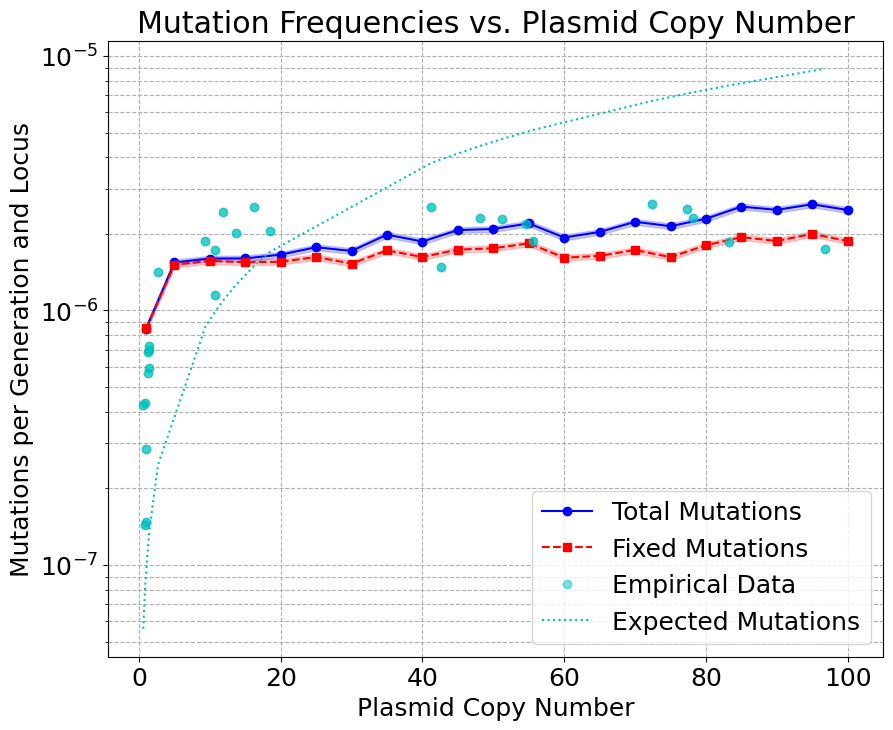

In [8]:


def plotFinalMutations(this_gens, max_plasmids, sim_results, plotSIM=''):
    """
    Aggregates and visualizes the final mutation frequencies in plasmids across multiple simulations.

    Parameters:
        this_gens: List of generation indices.
        max_plasmids: List of maximum plasmid copy numbers.
        sim_results: List of simulation results.
        plotSIM: Optional; file path to save the plot.
    """

    tot_expe = []
    final_plasmids = []
    final_muts = []
    final_all_muts = []

    for iplasmid, this_max_plasmids in enumerate(max_plasmids):
        tot_generations = num_generations * num_days
        sum_muts = np.zeros((1, tot_generations))
        sum_fixed_muts = np.zeros((1, tot_generations))
        sum_new_muts = np.zeros((1, tot_generations))
        sum_ht_muts = np.zeros((1, tot_generations))
        sum_lost_muts = np.zeros((1, tot_generations))
        cum_new_muts = np.zeros((1, tot_generations))
        cum_lost_muts = np.zeros((1, tot_generations))

        nexpe = 0
        for irep in range(0, num_reps):
            # Aggregate results from each replicate
            sum_muts += np.array(sim_results[iplasmid][irep]['rep_count_muts'])
            sum_fixed_muts += np.array(sim_results[iplasmid][irep]['rep_count_fixed_muts'])
            sum_ht_muts = sum_muts - sum_fixed_muts
            sum_new_muts += np.hstack([0, sim_results[iplasmid][irep]['rep_count_new_muts']])
            cum_new_muts += np.hstack([0, sim_results[iplasmid][irep]['rep_cum_new_muts']])
            sum_lost_muts += np.hstack([0, sim_results[iplasmid][irep]['rep_count_lost_muts']])
            cum_lost_muts += np.hstack([0, sim_results[iplasmid][irep]['rep_cum_lost_muts']])
            nexpe += sim_results[iplasmid][irep]['nexpe']
            freq_muts = sum_muts[0][-1]  # Frequency of mutations
            freq_all_muts = cum_new_muts[0][-1]  # Frequency of all mutations

            final_plasmids.append(this_max_plasmids)
            final_muts.append(freq_muts)
            final_all_muts.append(freq_all_muts)

        tot_expe.append(np.sum(nexpe))

    plt.rcParams.update({'font.size': 18})
    plt.rcParams['axes.facecolor'] = 'white'
    plt.rcParams['savefig.facecolor'] = 'white'
    fig, ax = plt.subplots(figsize=(10, 8))

    # Plot replicates for mutation frequency
    freq_mut = []
    for ifinal, this_final_mut in enumerate(final_muts):
        ip = (np.where(np.array(max_plasmids) == final_plasmids[ifinal]))[0]
        this_freq_mut = this_final_mut / tot_generations / tot_expe[ip[0]]
        freq_mut.append(this_freq_mut)
    freq_mut = np.asarray(freq_mut)

    # Plot replicates for all mutations
    freq_all_mut = []
    for ifinal, this_final_mut in enumerate(final_all_muts):
        ip = (np.where(np.array(max_plasmids) == final_plasmids[ifinal]))[0]
        this_all_freq_mut = this_final_mut / tot_generations / tot_expe[ip[0]]
        freq_all_mut.append(this_all_freq_mut)
    freq_all_mut = np.asarray(freq_all_mut)

    # Plot mean mutation frequencies
    mean_all_freq = []
    mean_freq = []
    for this_plasmid in max_plasmids:
        ip = list(np.where(np.array(final_plasmids) == this_plasmid))
        mean_freq.append(np.mean(freq_mut[list(ip[0])]))
        mean_all_freq.append(np.mean(freq_all_mut[list(ip[0])]))

    # Calculate standard error for the shaded area
    sem_all_freq = []
    sem_freq = []
    for this_plasmid in max_plasmids:
        ip = list(np.where(np.array(final_plasmids) == this_plasmid))
        sem_freq.append(np.std(freq_mut[list(ip[0])]) / np.sqrt(num_reps))
        sem_all_freq.append(np.std(freq_all_mut[list(ip[0])]) / np.sqrt(num_reps))

    mean_all_freq = np.array(mean_all_freq)
    mean_freq = np.array(mean_freq)
    sem_all_freq = np.array(sem_all_freq)
    sem_freq = np.array(sem_freq)

    # Plot shaded area for total mutations
    ax.fill_between(max_plasmids, mean_all_freq - sem_all_freq, mean_all_freq + sem_all_freq, color='blue', alpha=0.2)
    ax.plot(max_plasmids, mean_all_freq, 'o-', color='blue', label='Total Mutations')

    # Plot shaded area for fixed mutations
    ax.fill_between(max_plasmids, mean_freq - sem_freq, mean_freq + sem_freq, color='red', alpha=0.2)
    ax.plot(max_plasmids, mean_freq, 's--', color='red', label='Fixed Mutations')

    # Plot empirical data
    mut_data = np.loadtxt(pathDATA + 'DATA_mutation_rate.txt', skiprows=1, dtype=float)
    data_pcn = mut_data[:, 0]
    data_mut = mut_data[:, 1]
    data_expected_mut = mut_data[:, 2]

    ax.plot(data_pcn, data_mut, 'co', alpha=.5, label='Empirical Data')
    ax.plot(np.sort(data_pcn), np.sort(data_expected_mut), 'c:', label='Expected Mutations')

    ax.set_yscale('log')
    ax.set_xlabel('Plasmid Copy Number')
    ax.set_ylabel('Mutations per Generation and Locus')
    ax.set_title('Mutation Frequencies vs. Plasmid Copy Number')
    ax.grid(True, which="both", ls="--")
    ax.legend()

    if plotSIM != '':
        plt.savefig(plotSIM)
        print('Exporting ' + plotSIM)

    plt.show()


# Example usage
plotSIM = os.path.join(dirSIM, f'MAp_pcn_finalMutations_{num_days}_days_{num_generations}_gens_{mut_rate}_mut.png')
plotFinalMutations(this_gens, max_plasmids, sim_results, plotSIM)


### Visualization of Mutation Dynamics Over Generations

To visualize the dynamics of mutations over multiple generations, we used a function that summed and plotted various types of mutation counts for each plasmid copy number. The resulting plots show how mutations accumulate, become fixed, or are lost over time for different plasmid copy numbers.

#### Data Points

- **Total Mutations (Black Dotted Line)**: The cumulative count of all mutations that have occurred.
- **Lost Mutations (Red Dotted Line)**: The cumulative count of mutations that have been lost.
- **Fixed Mutations (Blue Dotted Line)**: The count of mutations that have become fixed in the population.
- **HT Mutations (Green Dotted Line)**: The count of heteroplasmic mutations (present in some but not all plasmids).
- **Current Mutations (Black Solid Line)**: The current count of mutations present in the population.

#### Plot Description

- **X-Axis**: Generations.
- **Y-Axis**: Number of mutations.

This visualization allows us to observe the behavior of mutations over time, highlighting the dynamics of mutation accumulation, fixation, and loss in plasmid populations.


<ipython-input-9-1ae91833d409>:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(8, 6))


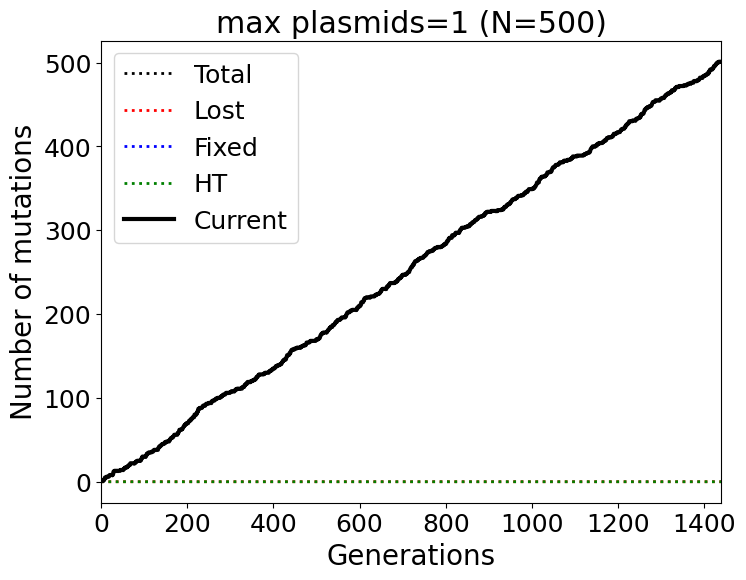

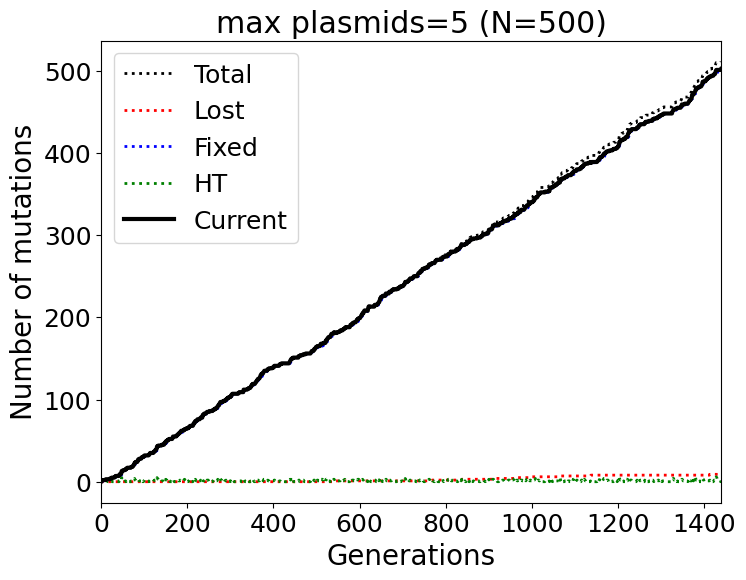

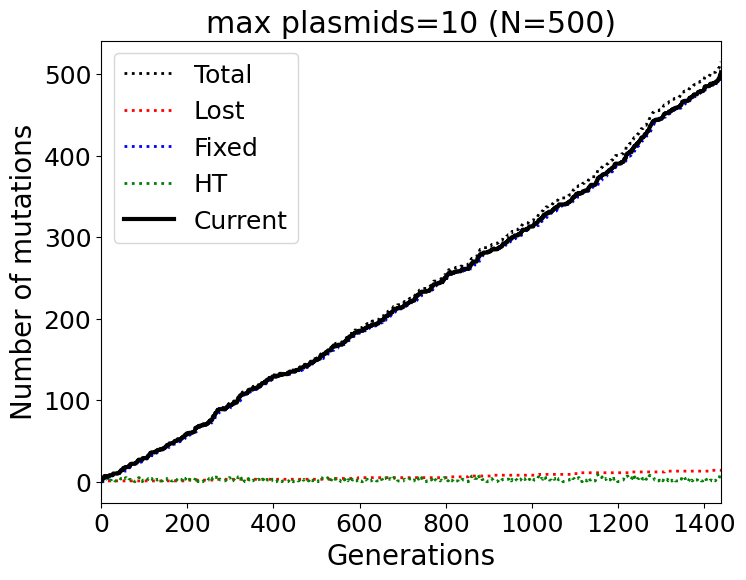

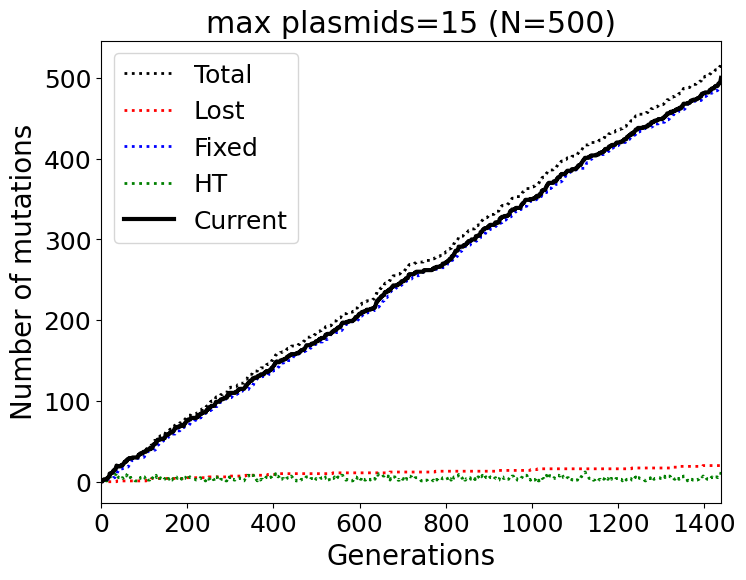

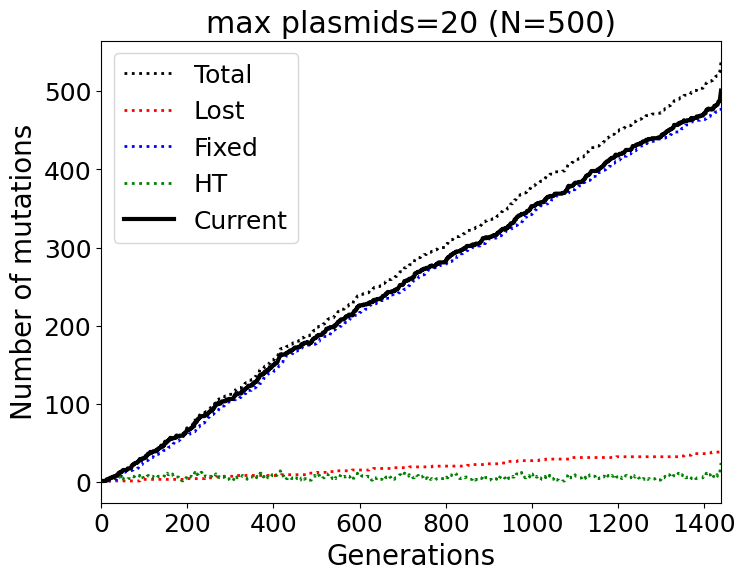

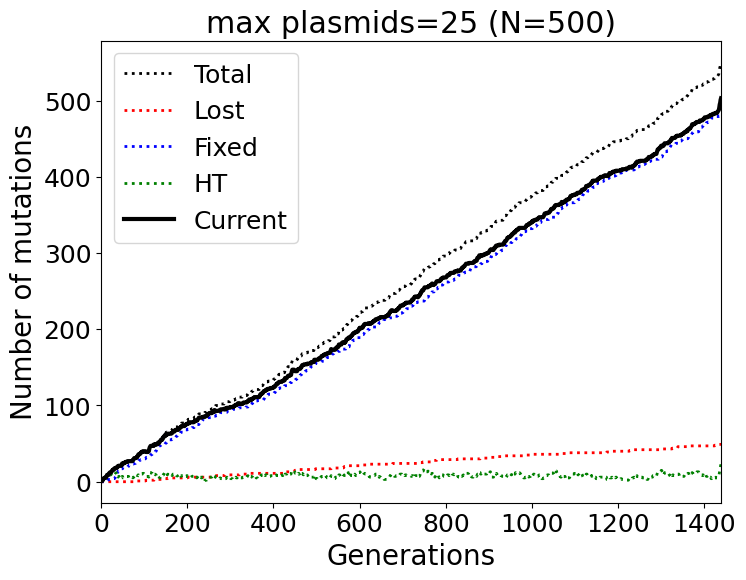

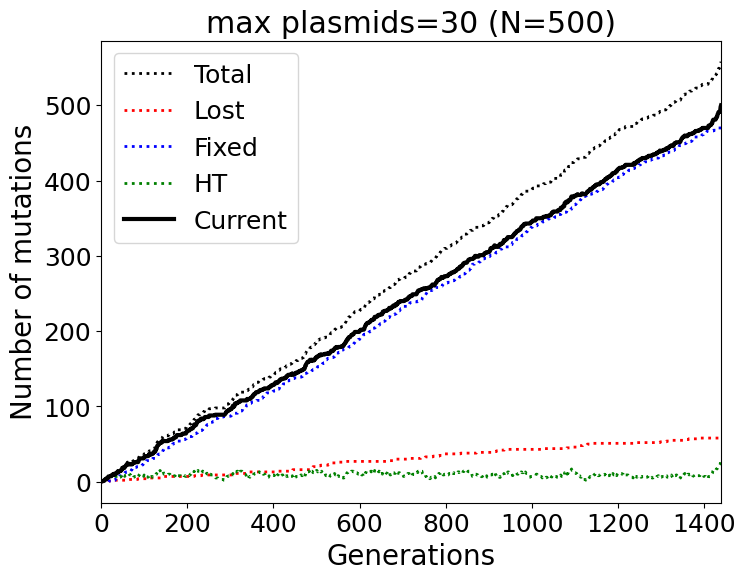

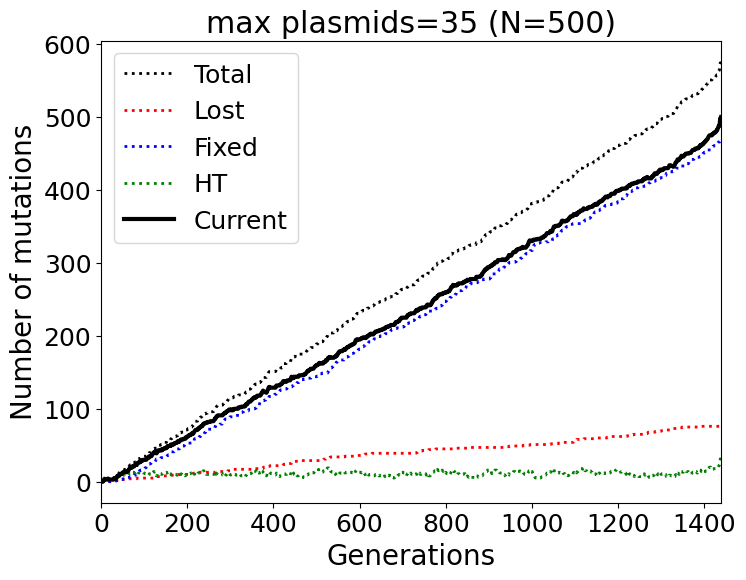

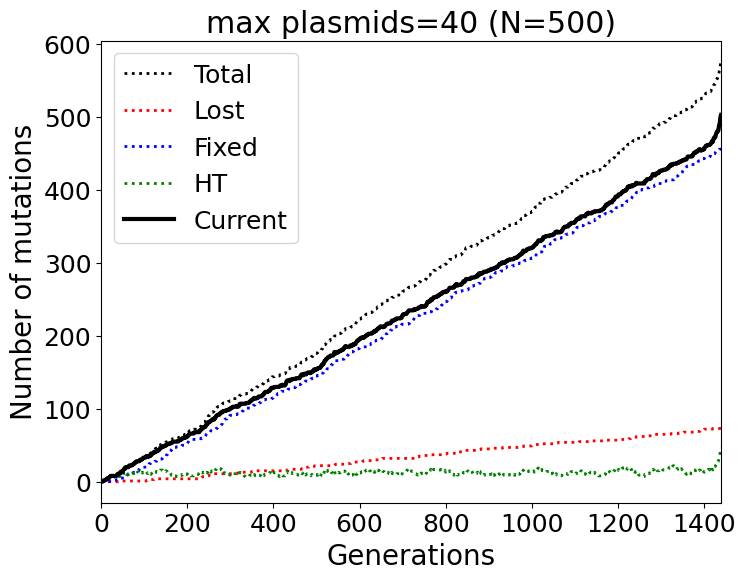

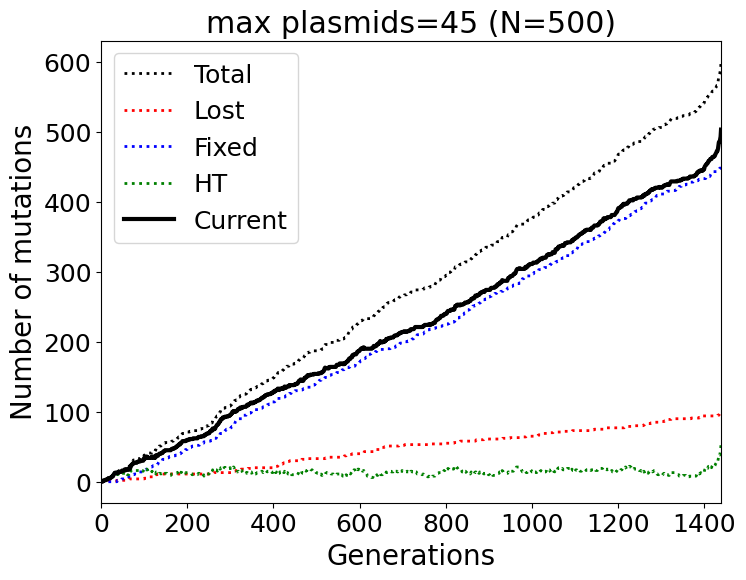

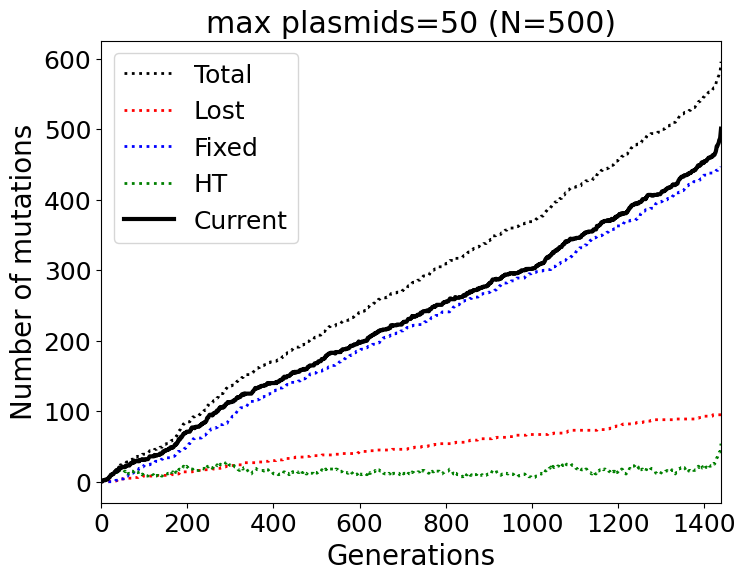

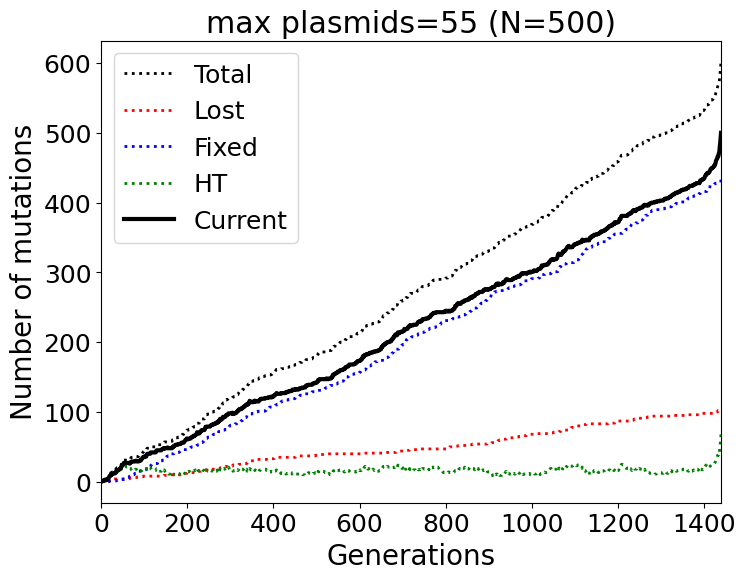

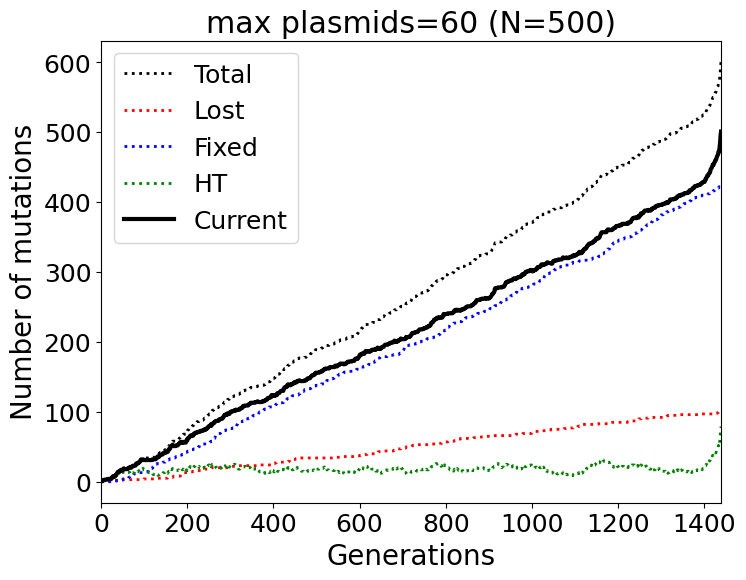

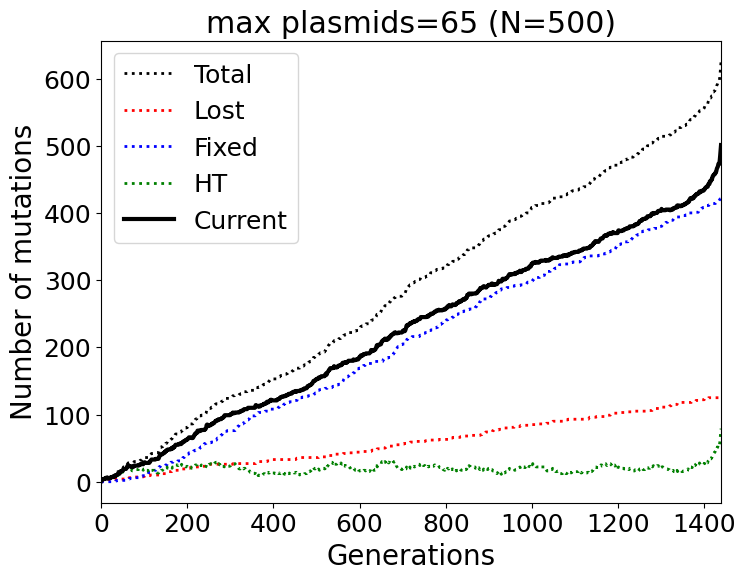

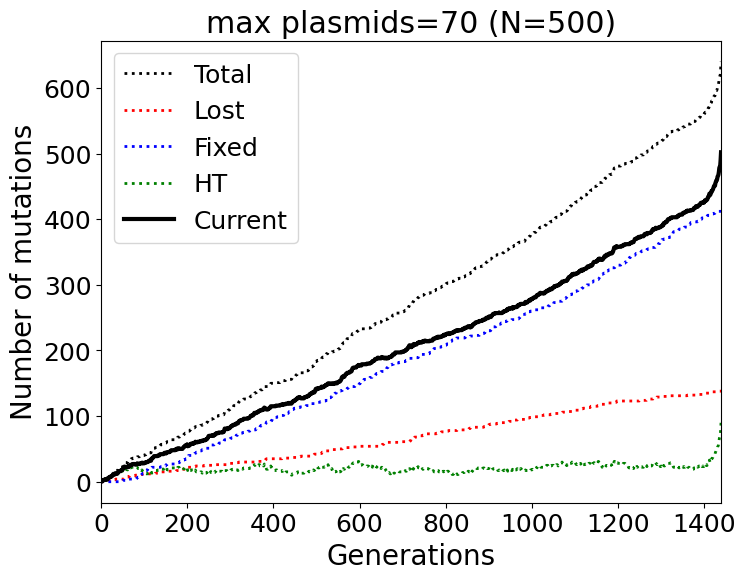

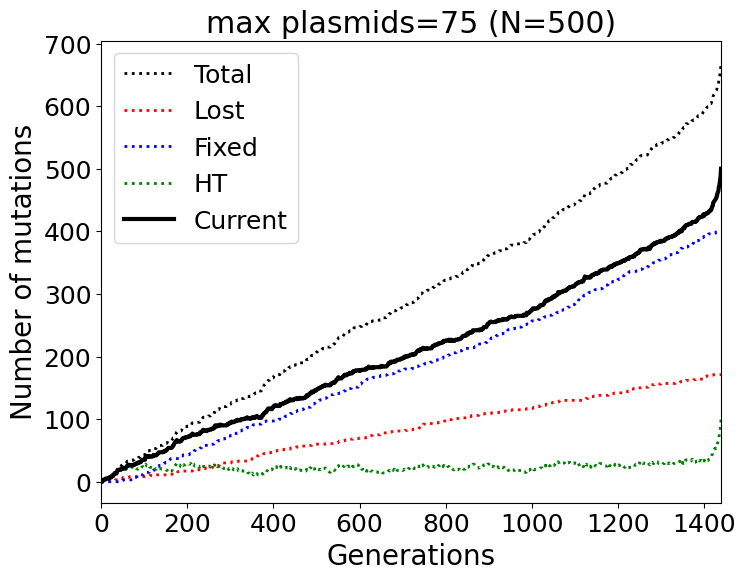

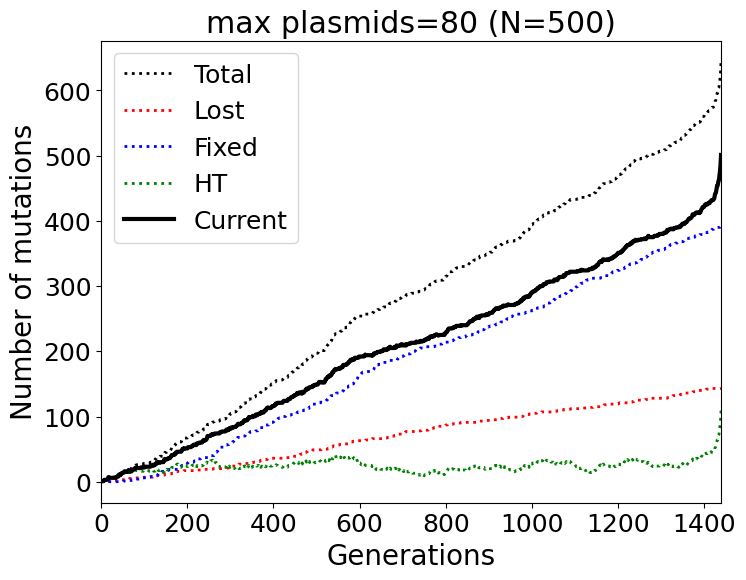

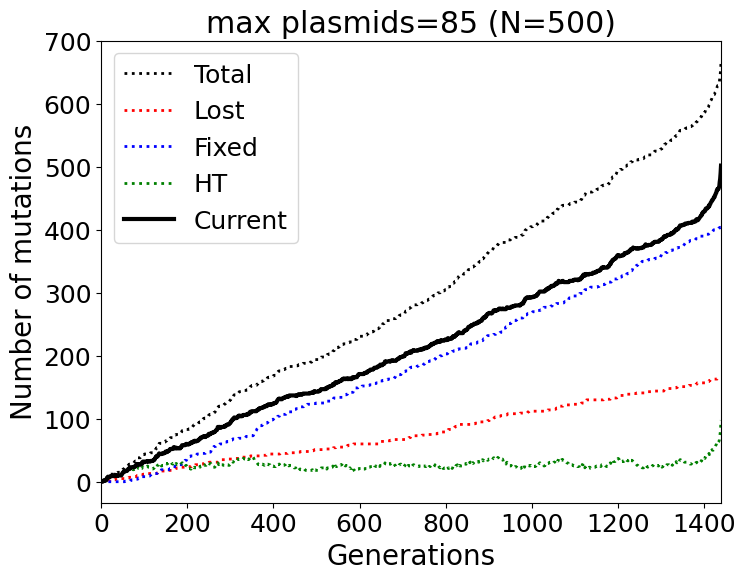

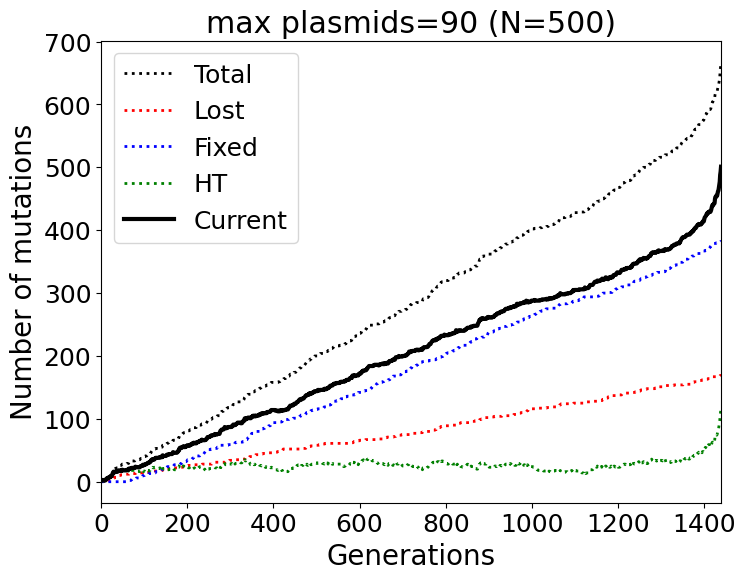

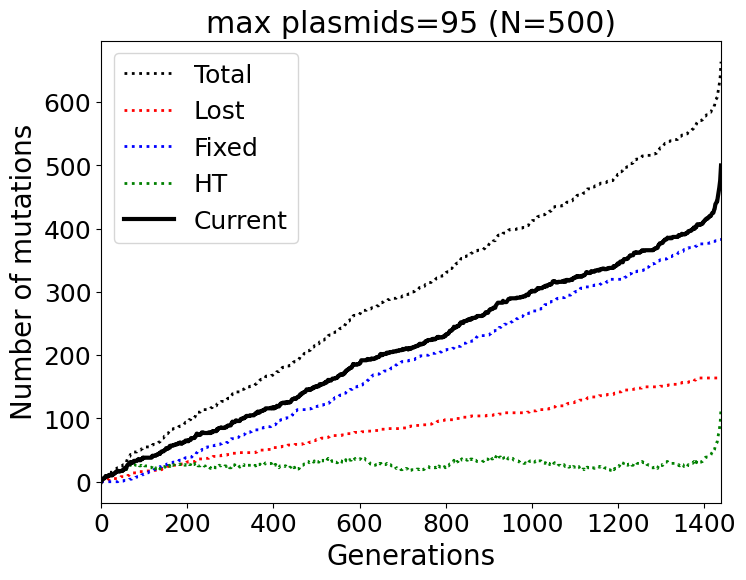

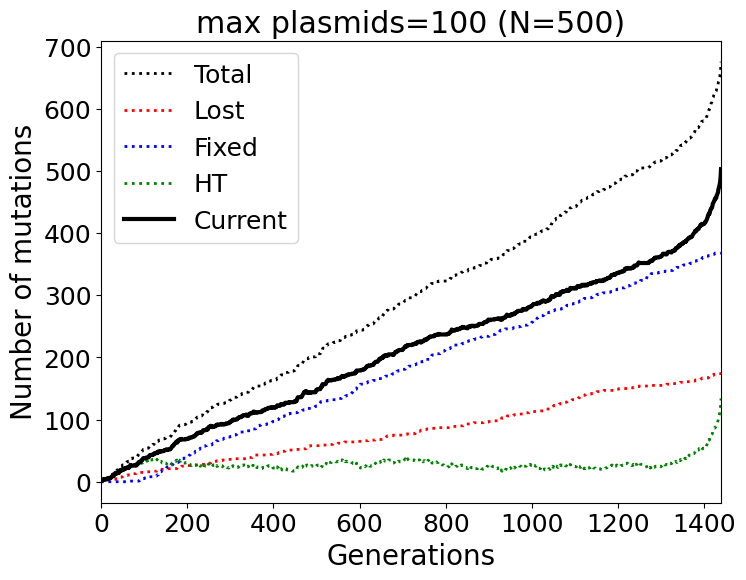

In [9]:
def plotSumMutGenerations(this_gens, max_plasmids, sim_results, plotSIM=''):
    """
    Aggregates and visualizes the mutation counts over multiple generations for different plasmid copy numbers.

    Parameters:
        this_gens: List of generation indices.
        max_plasmids: List of maximum plasmid copy numbers.
        sim_results: List of simulation results.
        plotSIM: Optional; file path to save the plot.
    """

    # Loop over each plasmid copy number
    for iplasmid, this_max_plasmids in enumerate(max_plasmids):

        # Initialize arrays to store mutation counts
        sum_muts = np.zeros((1, num_generations * num_days))
        sum_fixed_muts = np.zeros((1, num_generations * num_days))
        sum_new_muts = np.zeros((1, num_generations * num_days))
        sum_ht_muts = np.zeros((1, num_generations * num_days))
        sum_lost_muts = np.zeros((1, num_generations * num_days))
        cum_new_muts = np.zeros((1, num_generations * num_days))
        cum_lost_muts = np.zeros((1, num_generations * num_days))

        # Loop over each simulation repetition
        for irep in range(0, num_reps):

            # Sum mutation counts across repetitions
            sum_muts += np.array(sim_results[iplasmid][irep]['rep_count_muts'])
            sum_fixed_muts += np.array(sim_results[iplasmid][irep]['rep_count_fixed_muts'])

            # Compute the counts of non-fixed mutations (i.e. HT mutations)
            sum_ht_muts = sum_muts - sum_fixed_muts

            # Accumulate counts of new and lost mutations over time
            sum_new_muts += np.hstack([0, sim_results[iplasmid][irep]['rep_count_new_muts']])
            cum_new_muts += np.hstack([0, sim_results[iplasmid][irep]['rep_cum_new_muts']])
            sum_lost_muts += np.hstack([0, sim_results[iplasmid][irep]['rep_count_lost_muts']])
            cum_lost_muts += np.hstack([0, sim_results[iplasmid][irep]['rep_cum_lost_muts']])

        # Plot the mutation counts over time
        plt.rcParams.update({'font.size': 18})
        plt.rcParams['axes.facecolor'] = 'white'
        plt.rcParams['savefig.facecolor'] = 'white'
        fig, ax = plt.subplots(figsize=(8, 6))

        ax.plot(this_gens, cum_new_muts[0], 'k:', label='Total', lw=2)
        ax.plot(this_gens, cum_lost_muts[0], 'r:', label='Lost', lw=2)
        ax.plot(this_gens, sum_fixed_muts[0], 'b:', label='Fixed', lw=2)
        ax.plot(this_gens, sum_ht_muts[0], 'g:', label='HT', lw=2)
        ax.plot(this_gens, sum_muts[0], 'k-', label='Current', lw=3)

        ax.set_xlim([this_gens[0], this_gens[-1]])
        ax.set_xlabel('Generations', fontsize=20)
        ax.set_ylabel('Number of mutations', fontsize=20)
        ax.set_title('max plasmids=' + str(this_max_plasmids) + ' (N=' + str(num_reps) + ')')
        ax.legend()

        if plotSIM != '':
            parts = plotSIM.split('.')
            plotSIM = ""


plotSIM = dirSIM + '/MAp_pcn_days' + str(num_days) + '_gens' + str(num_generations) + '_mut' + str(mut_rate) + '.png'
#plotSIM = ''
this_gens = range(0, num_generations * num_days)
plotSumMutGenerations(this_gens, max_plasmids, sim_results, plotSIM)


### Visualization of Endpoint Mutations

To analyze the mutation dynamics at the end of the simulations, we used a function that aggregated and plotted the final mutation counts for different plasmid copy numbers. This function helps us understand the overall mutation accumulation, fixation, loss, and heteroplasmic mutations at the endpoint of the simulations.

- **X-Axis**: Plasmid Copy Number (PCN).
- **Y-Axis**: Accumulated Mutations.

#### Data Points

- **Total Mutations (Blue Line)**: The total number of mutations accumulated at the endpoint.
- **Lost Mutations (Red Line)**: The total number of mutations lost at the endpoint.
- **Fixed Mutations (Green Line)**: The total number of mutations that became fixed at the endpoint.
- **HT Mutations (Black Line)**: The number of heteroplasmic mutations at the endpoint (mutations present in some but not all plasmids).

This visualization provides a clear picture of the mutation dynamics at the end of the simulation period, allowing us to compare the effects of different plasmid copy numbers on mutation accumulation, loss, and fixation.


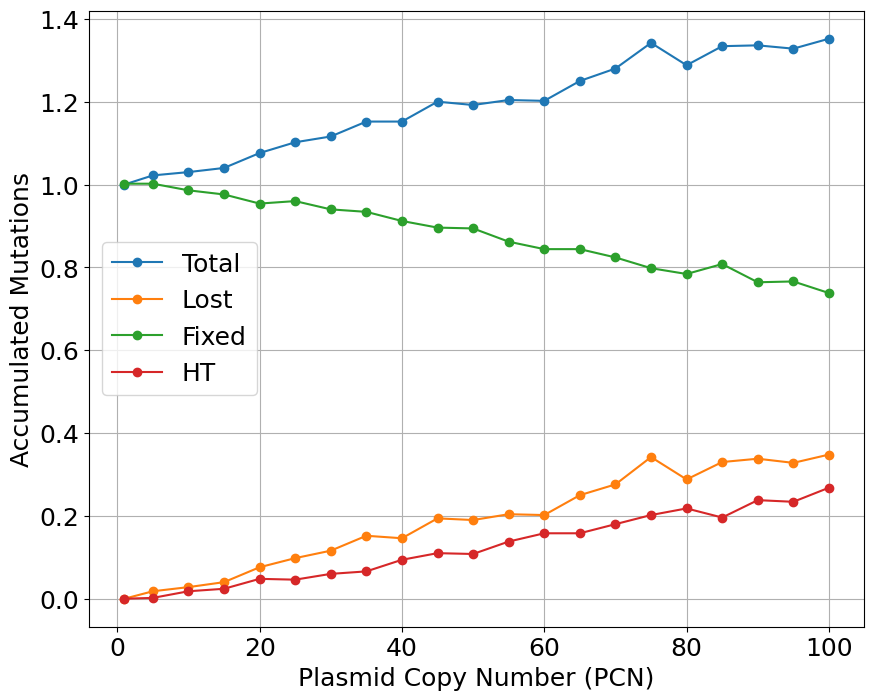

In [10]:
def plotEndpointMutations(max_plasmids, sim_results, num_reps, num_generations, num_days):
    """
    Aggregates and visualizes the final mutation counts at the endpoint of simulations for different plasmid copy numbers.

    Parameters:
        max_plasmids: List of maximum plasmid copy numbers.
        sim_results: List of simulation results.
        num_reps: Number of repetitions for each simulation.
        num_generations: Number of generations per day.
        num_days: Number of days for the simulation.
    """
    # Initialize arrays to store endpoint mutation counts
    endpoint_total = []
    endpoint_lost = []
    endpoint_fixed = []
    endpoint_ht = []

    # Loop over each plasmid copy number
    for iplasmid in range(len(max_plasmids)):

        # Variables to accumulate mutations over repetitions
        total_mut_accum = 0
        lost_mut_accum = 0
        fixed_mut_accum = 0
        ht_mut_accum = 0

        # Loop over each repetition
        for irep in range(num_reps):
            # Accumulate endpoint mutation counts
            total_mut_accum += sim_results[iplasmid][irep]['rep_cum_new_muts'][-1]
            lost_mut_accum += sim_results[iplasmid][irep]['rep_cum_lost_muts'][-1]
            fixed_mut_accum += sim_results[iplasmid][irep]['rep_count_fixed_muts'][-1]
            ht_mut_accum += (sim_results[iplasmid][irep]['rep_count_muts'][-1] -
                             sim_results[iplasmid][irep]['rep_count_fixed_muts'][-1])

        # Calculate averages and append to the respective arrays
        endpoint_total.append(total_mut_accum / num_reps)
        endpoint_lost.append(lost_mut_accum / num_reps)
        endpoint_fixed.append(fixed_mut_accum / num_reps)
        endpoint_ht.append(ht_mut_accum / num_reps)

    # Create the plot
    plt.figure(figsize=(10, 8))
    plt.plot(max_plasmids, endpoint_total, 'o-', label='Total')
    plt.plot(max_plasmids, endpoint_lost, 'o-', label='Lost')
    plt.plot(max_plasmids, endpoint_fixed, 'o-', label='Fixed')
    plt.plot(max_plasmids, endpoint_ht, 'o-', label='HT')

    plt.xlabel('Plasmid Copy Number (PCN)')
    plt.ylabel('Accumulated Mutations')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
plotEndpointMutations(max_plasmids, sim_results, num_reps, num_generations, num_days)


### Visualization of Mutation Probabilities

To analyze the probability of mutations across different plasmid copy numbers, we used a function that aggregates mutation data from multiple simulations and calculates the frequency of various mutation types. This function helps visualize how the probability of mutations changes with plasmid copy number and includes a linear fit to model the relationship.

- **X-Axis**: Plasmid copy number.
- **Y-Axis**: Probability of mutation.

#### Data Points

- **Total Mutations**: The overall frequency of mutations accumulated.
- **Fixed Mutations**: The frequency of mutations that have become fixed in the population.
- **Lost Mutations**: The frequency of mutations that have been lost.
- **Simulation Data**: The frequencies of mutations obtained from the simulations.
- **Linear Fit**: A linear curve fitted to the simulation data to model the relationship between plasmid copy number and mutation probability.





final_plasmids= [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
final_muts= [501.0, 502.0, 502.0, 500.0, 501.0, 503.0, 500.0, 500.0, 503.0, 503.0, 501.0, 500.0, 501.0, 501.0, 502.0, 500.0, 501.0, 502.0, 501.0, 500.0, 503.0]
final_fixed_muts= [501.0, 501.0, 493.0, 488.0, 477.0, 480.0, 470.0, 467.0, 456.0, 448.0, 447.0, 431.0, 422.0, 422.0, 412.0, 399.0, 392.0, 404.0, 382.0, 383.0, 369.0]
final_all_muts= [500.0, 511.0, 515.0, 520.0, 538.0, 551.0, 558.0, 576.0, 576.0, 600.0, 596.0, 602.0, 601.0, 625.0, 640.0, 671.0, 644.0, 667.0, 668.0, 664.0, 676.0]
final_lost_muts= [501.0, 502.0, 502.0, 500.0, 501.0, 503.0, 500.0, 500.0, 503.0, 503.0, 501.0, 500.0, 501.0, 501.0, 502.0, 500.0, 501.0, 502.0, 501.0, 500.0, 503.0]
final_all_lost_muts= [0.0, 9.0, 14.0, 20.0, 38.0, 49.0, 58.0, 76.0, 73.0, 97.0, 95.0, 102.0, 101.0, 125.0, 138.0, 171.0, 144.0, 165.0, 169.0, 164.0, 174.0]
u= 2.543160064055107e-08
v= 2.707207377902691e-06


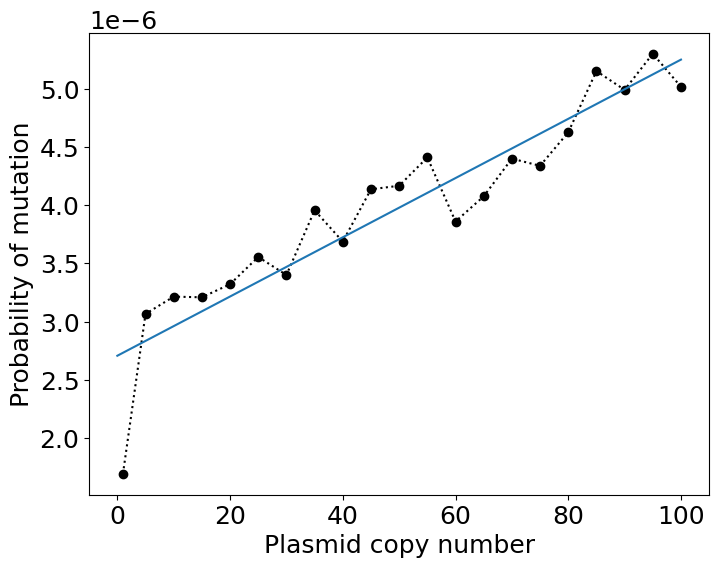

In [11]:
def plotProbMutation(this_gens, max_plasmids, sim_results, plotSIM=''):
    """
    Aggregates and visualizes the probabilities of various mutations across different plasmid copy numbers.

    Parameters:
        this_gens: List of generation indices.
        max_plasmids: List of maximum plasmid copy numbers.
        sim_results: List of simulation results.
        plotSIM: Optional; file path to save the plot.
    """
    tot_expe = []

    final_plasmids = []
    final_muts = []
    final_all_muts = []
    final_fixed_muts = []
    final_lost_muts = []
    final_all_lost_muts = []

    # Loop over each plasmid copy number
    for iplasmid, this_max_plasmids in enumerate(max_plasmids):

        tot_generations = num_generations * num_days
        sum_muts = np.zeros((1, tot_generations))
        sum_fixed_muts = np.zeros((1, tot_generations))
        sum_new_muts = np.zeros((1, tot_generations))
        sum_ht_muts = np.zeros((1, tot_generations))
        sum_lost_muts = np.zeros((1, tot_generations))
        cum_new_muts = np.zeros((1, tot_generations))
        cum_lost_muts = np.zeros((1, tot_generations))

        nexpe = 0
        for irep in range(0, num_reps):

            # Sum mutation counts across repetitions
            sum_muts += np.array(sim_results[iplasmid][irep]['rep_count_muts'])
            sum_fixed_muts += np.array(sim_results[iplasmid][irep]['rep_count_fixed_muts'])
            sum_ht_muts = sum_muts - sum_fixed_muts
            sum_new_muts += np.hstack([0, sim_results[iplasmid][irep]['rep_count_new_muts']])
            cum_new_muts += np.hstack([0, sim_results[iplasmid][irep]['rep_cum_new_muts']])
            sum_lost_muts += np.hstack([0, sim_results[iplasmid][irep]['rep_count_lost_muts']])
            cum_lost_muts += np.hstack([0, sim_results[iplasmid][irep]['rep_cum_lost_muts']])

            nexpe += sim_results[iplasmid][irep]['nexpe']
            count_muts = sum_muts[0][-1]
            count_all_muts = cum_new_muts[0][-1]
            count_lost_muts = sum_muts[0][-1]
            count_all_lost_muts = cum_lost_muts[0][-1]
            count_fixed_muts = sum_fixed_muts[0][-1]

        final_plasmids.append(this_max_plasmids)
        final_muts.append(count_muts)
        final_fixed_muts.append(count_fixed_muts)
        final_all_muts.append(count_all_muts)
        final_lost_muts.append(count_lost_muts)
        final_all_lost_muts.append(count_all_lost_muts)

        tot_expe.append(np.sum(nexpe))

    plt.rcParams.update({'font.size': 18})
    plt.rcParams['axes.facecolor'] = 'white'
    plt.rcParams['savefig.facecolor'] = 'white'
    fig, ax = plt.subplots(figsize=(8, 6))

    print('final_plasmids=', final_plasmids)
    print('final_muts=', final_muts)
    print('final_fixed_muts=', final_fixed_muts)
    print('final_all_muts=', final_all_muts)
    print('final_lost_muts=', final_lost_muts)
    print('final_all_lost_muts=', final_all_lost_muts)

    # All mutations
    freq_all_mut = []
    for ifinal, this_final_mut in enumerate(final_all_muts):
        ip = (np.where(np.array(max_plasmids) == final_plasmids[ifinal]))[0]
        this_all_freq_mut = this_final_mut / tot_generations / tot_expe[ip[0]]
        freq_all_mut.append(this_all_freq_mut)
    freq_all_mut = np.asarray(freq_all_mut)

    # Fixed mutations
    freq_fixed_mut = []
    for ifinal, this_fixed_mut in enumerate(final_fixed_muts):
        ip = (np.where(np.array(max_plasmids) == final_plasmids[ifinal]))[0]
        this_fixed_freq_mut = this_fixed_mut
        freq_fixed_mut.append(this_fixed_freq_mut)
    freq_fixed_mut = np.asarray(freq_fixed_mut)

    # Lost mutations
    freq_lost_mut = []
    for ifinal, this_lost_mut in enumerate(final_all_lost_muts):
        ip = (np.where(np.array(max_plasmids) == final_plasmids[ifinal]))[0]
        this_lost_freq_mut = this_lost_mut
        freq_lost_mut.append(this_lost_freq_mut)
    freq_lost_mut = np.asarray(freq_lost_mut)

    # Plot mean frequencies
    mean_all_freq = []
    for this_plasmid in max_plasmids:
        ip = list(np.where(np.array(final_plasmids) == this_plasmid))
        mean_all_freq.append(np.mean(freq_all_mut[list(ip[0])]))
    plt.plot(max_plasmids, mean_all_freq, 'ko:', label='Simulation data')

    # Fit a linear curve (1st order polynomial) to the data
    params = np.polyfit(np.array(final_plasmids).astype(float), mean_all_freq, 1)

    # Print the parameters of the linear curve
    print('u=', params[0])
    print('v=', params[1])

    # Evaluate the linear curve at new x values
    xfit = np.array([0, np.max(np.array(final_plasmids))])
    yfit = np.polyval(params, xfit)

    # Plot the original data and the linear curve
    plt.plot(xfit, yfit, label='Linear fit')

    ax.set_xlabel('Plasmid copy number')
    ax.set_ylabel('Probability of mutation')

    if plotSIM != '':
        plt.savefig(plotSIM)
        print('Exporting ' + plotSIM)

    plt.show()

# Example usage
plotSIM = ''
this_gens = range(0, num_generations * num_days)
plotProbMutation(this_gens, max_plasmids, sim_results, plotSIM)


### Visualization of Mutation Persistence

To analyze the persistence of mutations across different plasmid copy numbers, we used a function that aggregates mutation data from multiple simulations and calculates the frequency of various mutation types. This function helps visualize how the persistence of mutations changes with plasmid copy number and includes an exponential fit to model the relationship.

- **X-Axis**: Plasmid copy number.
- **Y-Axis**: Probability of mutation persistence.

#### Data Points

- **Total Mutations**: The overall frequency of mutations accumulated.
- **Fixed Mutations**: The frequency of mutations that have become fixed in the population.
- **Lost Mutations**: The frequency of mutations that have been lost.
- **Simulation Data**: The frequencies of mutations obtained from the simulations.
- **Exponential Fit**: An exponential curve fitted to the simulation data to model the relationship between plasmid copy number and mutation persistence probability.


[204980, 115723, 111247, 112528, 112485, 107619, 113954, 101114, 108476, 100722, 99325, 94792, 108123, 106483, 101008, 107412, 96676, 89909, 92949, 86986, 93573]
final_plasmids= [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
final_muts= [501.0, 502.0, 502.0, 500.0, 501.0, 503.0, 500.0, 500.0, 503.0, 503.0, 501.0, 500.0, 501.0, 501.0, 502.0, 500.0, 501.0, 502.0, 501.0, 500.0, 503.0]
final_fixed_muts= [501.0, 501.0, 493.0, 488.0, 477.0, 480.0, 470.0, 467.0, 456.0, 448.0, 447.0, 431.0, 422.0, 422.0, 412.0, 399.0, 392.0, 404.0, 382.0, 383.0, 369.0]
final_all_muts= [500.0, 511.0, 515.0, 520.0, 538.0, 551.0, 558.0, 576.0, 576.0, 600.0, 596.0, 602.0, 601.0, 625.0, 640.0, 671.0, 644.0, 667.0, 668.0, 664.0, 676.0]
final_lost_muts= [501.0, 502.0, 502.0, 500.0, 501.0, 503.0, 500.0, 500.0, 503.0, 503.0, 501.0, 500.0, 501.0, 501.0, 502.0, 500.0, 501.0, 502.0, 501.0, 500.0, 503.0]
final_all_lost_muts= [0.0, 9.0, 14.0, 20.0, 38.0, 49.0, 58.0, 76.0, 73.0, 97.0, 95.

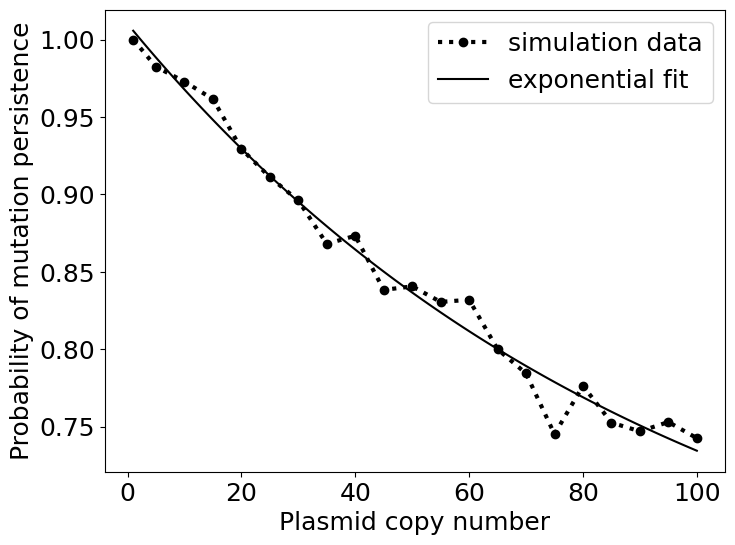

In [12]:
# define the exponential function to fit
def exponential_func(x, a, b, c):
    return a * np.exp(-b * x) + c

def plotMutPersistence(this_gens, max_plasmids, sim_results, plotSIM=''):
    """
    Aggregates and visualizes the probabilities of mutation persistence across different plasmid copy numbers.

    Parameters:
        this_gens: List of generation indices.
        max_plasmids: List of maximum plasmid copy numbers.
        sim_results: List of simulation results.
        plotSIM: Optional; file path to save the plot.
    """
    tot_expe = []

    final_plasmids = []
    final_muts = []
    final_all_muts = []
    final_fixed_muts = []
    final_lost_muts = []
    final_all_lost_muts = []

    # Loop over each plasmid copy number
    for iplasmid, this_max_plasmids in enumerate(max_plasmids):

        tot_generations = num_generations * num_days
        sum_muts = np.zeros((1, tot_generations))
        sum_fixed_muts = np.zeros((1, tot_generations))
        sum_new_muts = np.zeros((1, tot_generations))
        sum_ht_muts = np.zeros((1, tot_generations))
        sum_lost_muts = np.zeros((1, tot_generations))
        cum_new_muts = np.zeros((1, tot_generations))
        cum_lost_muts = np.zeros((1, tot_generations))

        nexpe = 0
        for irep in range(0, num_reps):

            # Sum mutation counts across repetitions
            sum_muts += np.array(sim_results[iplasmid][irep]['rep_count_muts'])
            sum_fixed_muts += np.array(sim_results[iplasmid][irep]['rep_count_fixed_muts'])
            sum_ht_muts = sum_muts - sum_fixed_muts
            sum_new_muts += np.hstack([0, sim_results[iplasmid][irep]['rep_count_new_muts']])
            cum_new_muts += np.hstack([0, sim_results[iplasmid][irep]['rep_cum_new_muts']])
            sum_lost_muts += np.hstack([0, sim_results[iplasmid][irep]['rep_count_lost_muts']])
            cum_lost_muts += np.hstack([0, sim_results[iplasmid][irep]['rep_cum_lost_muts']])

            nexpe += sim_results[iplasmid][irep]['nexpe']
            count_muts = sum_muts[0][-1]
            count_all_muts = cum_new_muts[0][-1]
            count_lost_muts = sum_muts[0][-1]
            count_all_lost_muts = cum_lost_muts[0][-1]
            count_fixed_muts = sum_fixed_muts[0][-1]

        final_plasmids.append(this_max_plasmids)
        final_muts.append(count_muts)
        final_fixed_muts.append(count_fixed_muts)
        final_all_muts.append(count_all_muts)
        final_lost_muts.append(count_lost_muts)
        final_all_lost_muts.append(count_all_lost_muts)

        tot_expe.append(np.sum(nexpe))

    plt.rcParams.update({'font.size': 18})
    plt.rcParams['axes.facecolor'] = 'white'
    plt.rcParams['savefig.facecolor'] = 'white'
    fig, ax = plt.subplots(figsize=(8, 6))

    print(tot_expe)
    print('final_plasmids=', final_plasmids)
    print('final_muts=', final_muts)
    print('final_fixed_muts=', final_fixed_muts)
    print('final_all_muts=', final_all_muts)
    print('final_lost_muts=', final_lost_muts)
    print('final_all_lost_muts=', final_all_lost_muts)

    # All mutations
    freq_all_mut = []
    for ifinal, this_final_mut in enumerate(final_all_muts):
        ip = (np.where(np.array(max_plasmids) == final_plasmids[ifinal]))[0]
        this_all_freq_mut = this_final_mut
        freq_all_mut.append(this_all_freq_mut)
    freq_all_mut = np.asarray(freq_all_mut)

    # Fixed mutations
    freq_fixed_mut = []
    for ifinal, this_fixed_mut in enumerate(final_fixed_muts):
        ip = (np.where(np.array(max_plasmids) == final_plasmids[ifinal]))[0]
        this_fixed_freq_mut = this_fixed_mut
        freq_fixed_mut.append(this_fixed_freq_mut)
    freq_fixed_mut = np.asarray(freq_fixed_mut)

    # Lost mutations
    freq_all_lost_mut = []
    for ifinal, this_lost_mut in enumerate(final_all_lost_muts):
        ip = (np.where(np.array(max_plasmids) == final_plasmids[ifinal]))[0]
        this_lost_freq_mut = this_lost_mut
        freq_all_lost_mut.append(this_lost_freq_mut)
    freq_all_lost_mut = np.asarray(freq_all_lost_mut)

    # Plot mean frequencies
    mean_all_freq = []
    for this_plasmid in max_plasmids:
        ip = list(np.where(np.array(final_plasmids) == this_plasmid))
        mean_all_freq.append(np.mean(freq_all_mut[list(ip[0])]))

    # Plot all lost mutations
    mean_lost_freq = []
    for this_plasmid in max_plasmids:
        ip = list(np.where(np.array(final_plasmids) == this_plasmid))
        mean_lost_freq.append(np.mean(freq_all_lost_mut[list(ip[0])]))

    ax.set_xlabel('Plasmid copy number')
    ax.set_ylabel('Probability of mutation persistence', color="black", fontsize=18)

    freq_mut = (np.array(mean_all_freq) / np.asarray(tot_expe) / tot_generations).astype(float)
    mut_lost = np.array(1 - freq_all_lost_mut / freq_all_mut).astype(float)
    plt.plot(final_plasmids, mut_lost, 'k:o', lw=3, label='simulation data')

    # Perform the fit using curve_fit
    popt, pcov = curve_fit(exponential_func, np.array(final_plasmids).astype(float), mut_lost, method='lm')
    # Print best-fit curve parameters
    print('a =', popt[0])
    print('b =', popt[1])
    print('c =', popt[2])

    # Plot the data and fitted curve
    xnew = np.linspace(1, np.max(max_plasmids), 100)
    yfit = exponential_func(xnew, *popt)
    plt.plot(xnew, yfit, 'k-', label='exponential fit')
    plt.legend()

    if plotSIM != '':
        plt.savefig(plotSIM)
        print('Exporting ' + plotSIM)

    plt.show()

plotSIM = dirSIM + '/MAp_pcn_mutPersistence_days' + str(num_days) + '_gens' + str(num_generations) + '_mut' + str(mut_rate) + '.png'
this_gens = range(0, num_generations * num_days)
plotMutPersistence(this_gens, max_plasmids, sim_results, plotSIM)


### Visualization of Mutation Fixation Probability

To analyze the fixation probability of mutations across different plasmid copy numbers, we used a function that aggregates mutation data from multiple simulations and calculates the frequency of various mutation types. This function helps visualize how the fixation probability of mutations changes with plasmid copy number.

- **X-Axis**: Plasmid copy number.
- **Y-Axis**:
  - Left Y-Axis: Probability of mutation persistence (Blue Line).
  - Right Y-Axis: Probability of mutation fixation (Red Line).


#### Data Points

- **Total Mutations**: The overall frequency of mutations accumulated.
- **Fixed Mutations**: The frequency of mutations that have become fixed in the population.
- **Lost Mutations**: The frequency of mutations that have been lost.
- **Simulation Data**: The frequencies of mutations obtained from the simulations.




[204980, 115723, 111247, 112528, 112485, 107619, 113954, 101114, 108476, 100722, 99325, 94792, 108123, 106483, 101008, 107412, 96676, 89909, 92949, 86986, 93573]
final_plasmids= [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
final_muts= [501.0, 502.0, 502.0, 500.0, 501.0, 503.0, 500.0, 500.0, 503.0, 503.0, 501.0, 500.0, 501.0, 501.0, 502.0, 500.0, 501.0, 502.0, 501.0, 500.0, 503.0]
final_fixed_muts= [501.0, 501.0, 493.0, 488.0, 477.0, 480.0, 470.0, 467.0, 456.0, 448.0, 447.0, 431.0, 422.0, 422.0, 412.0, 399.0, 392.0, 404.0, 382.0, 383.0, 369.0]
final_all_muts= [500.0, 511.0, 515.0, 520.0, 538.0, 551.0, 558.0, 576.0, 576.0, 600.0, 596.0, 602.0, 601.0, 625.0, 640.0, 671.0, 644.0, 667.0, 668.0, 664.0, 676.0]
final_lost_muts= [501.0, 502.0, 502.0, 500.0, 501.0, 503.0, 500.0, 500.0, 503.0, 503.0, 501.0, 500.0, 501.0, 501.0, 502.0, 500.0, 501.0, 502.0, 501.0, 500.0, 503.0]
final_all_lost_muts= [0.0, 9.0, 14.0, 20.0, 38.0, 49.0, 58.0, 76.0, 73.0, 97.0, 95.

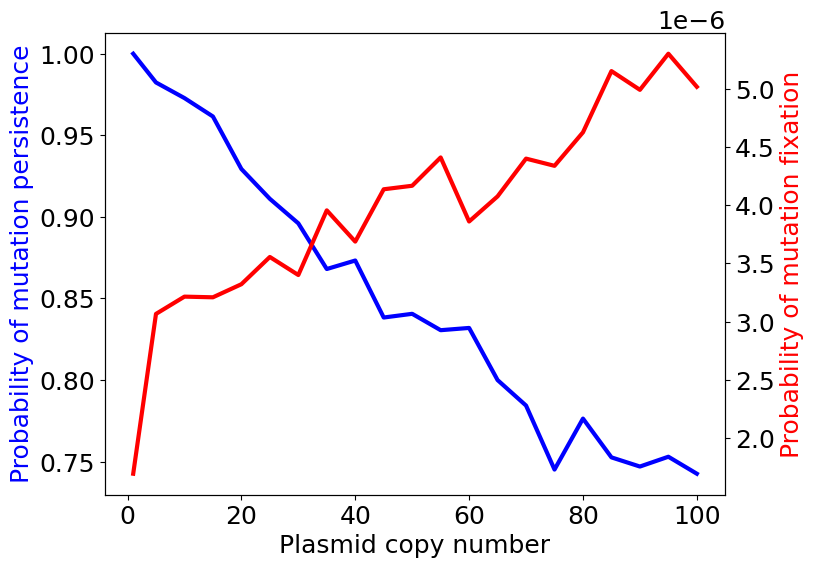

In [13]:
def plotProbFixation(this_gens, max_plasmids, sim_results, plotSIM=''):
    """
    Aggregates and visualizes the probabilities of mutation fixation and persistence across different plasmid copy numbers.

    Parameters:
        this_gens: List of generation indices.
        max_plasmids: List of maximum plasmid copy numbers.
        sim_results: List of simulation results.
        plotSIM: Optional; file path to save the plot.
    """
    tot_expe = []

    final_plasmids = []
    final_muts = []
    final_all_muts = []
    final_fixed_muts = []
    final_lost_muts = []
    final_all_lost_muts = []

    # Loop over each plasmid copy number
    for iplasmid, this_max_plasmids in enumerate(max_plasmids):

        tot_generations = num_generations * num_days
        sum_muts = np.zeros((1, tot_generations))
        sum_fixed_muts = np.zeros((1, tot_generations))
        sum_new_muts = np.zeros((1, tot_generations))
        sum_ht_muts = np.zeros((1, tot_generations))
        sum_lost_muts = np.zeros((1, tot_generations))
        cum_new_muts = np.zeros((1, tot_generations))
        cum_lost_muts = np.zeros((1, tot_generations))

        nexpe = 0
        for irep in range(0, num_reps):

            # Sum mutation counts across repetitions
            sum_muts += np.array(sim_results[iplasmid][irep]['rep_count_muts'])
            sum_fixed_muts += np.array(sim_results[iplasmid][irep]['rep_count_fixed_muts'])
            sum_ht_muts = sum_muts - sum_fixed_muts
            sum_new_muts += np.hstack([0, sim_results[iplasmid][irep]['rep_count_new_muts']])
            cum_new_muts += np.hstack([0, sim_results[iplasmid][irep]['rep_cum_new_muts']])
            sum_lost_muts += np.hstack([0, sim_results[iplasmid][irep]['rep_count_lost_muts']])
            cum_lost_muts += np.hstack([0, sim_results[iplasmid][irep]['rep_cum_lost_muts']])

            nexpe += sim_results[iplasmid][irep]['nexpe']
            count_muts = sum_muts[0][-1]
            count_all_muts = cum_new_muts[0][-1]
            count_lost_muts = sum_muts[0][-1]
            count_all_lost_muts = cum_lost_muts[0][-1]
            count_fixed_muts = sum_fixed_muts[0][-1]

        final_plasmids.append(this_max_plasmids)
        final_muts.append(count_muts)
        final_fixed_muts.append(count_fixed_muts)
        final_all_muts.append(count_all_muts)
        final_lost_muts.append(count_lost_muts)
        final_all_lost_muts.append(count_all_lost_muts)

        tot_expe.append(np.sum(nexpe))

    plt.rcParams.update({'font.size': 18})
    plt.rcParams['axes.facecolor'] = 'white'
    plt.rcParams['savefig.facecolor'] = 'white'
    fig, ax = plt.subplots(figsize=(8, 6))

    print(tot_expe)
    print('final_plasmids=', final_plasmids)
    print('final_muts=', final_muts)
    print('final_fixed_muts=', final_fixed_muts)
    print('final_all_muts=', final_all_muts)
    print('final_lost_muts=', final_lost_muts)
    print('final_all_lost_muts=', final_all_lost_muts)

    # All mutations
    freq_all_mut = []
    for ifinal, this_final_mut in enumerate(final_all_muts):
        ip = (np.where(np.array(max_plasmids) == final_plasmids[ifinal]))[0]
        this_all_freq_mut = this_final_mut
        freq_all_mut.append(this_all_freq_mut)
    freq_all_mut = np.asarray(freq_all_mut)

    # Fixed mutations
    freq_fixed_mut = []
    for ifinal, this_fixed_mut in enumerate(final_fixed_muts):
        ip = (np.where(np.array(max_plasmids) == final_plasmids[ifinal]))[0]
        this_fixed_freq_mut = this_fixed_mut
        freq_fixed_mut.append(this_fixed_freq_mut)
    freq_fixed_mut = np.asarray(freq_fixed_mut)

    # Lost mutations
    freq_all_lost_mut = []
    for ifinal, this_lost_mut in enumerate(final_all_lost_muts):
        ip = (np.where(np.array(max_plasmids) == final_plasmids[ifinal]))[0]
        this_lost_freq_mut = this_lost_mut
        freq_all_lost_mut.append(this_lost_freq_mut)
    freq_all_lost_mut = np.asarray(freq_all_lost_mut)

    # Plot mean frequencies
    mean_all_freq = []
    for this_plasmid in max_plasmids:
        ip = list(np.where(np.array(final_plasmids) == this_plasmid))
        mean_all_freq.append(np.mean(freq_all_mut[list(ip[0])]))

    # Plot all lost mutations
    mean_lost_freq = []
    for this_plasmid in max_plasmids:
        ip = list(np.where(np.array(final_plasmids) == this_plasmid))
        mean_lost_freq.append(np.mean(freq_all_lost_mut[list(ip[0])]))

    ax.set_xlabel('Plasmid copy number')
    ax.set_ylabel('Probability of mutation persistence', color="blue", fontsize=18)

    # Calculate and plot the fraction of lost mutations
    frac_lost = 1 - freq_all_lost_mut / freq_all_mut
    plt.plot(final_plasmids, frac_lost, 'b-', lw=3)

    freq_mut = np.asarray(mean_all_freq) / np.asarray(tot_expe) / tot_generations
    print(freq_mut)

    # Create a secondary y-axis to plot mutation fixation probability
    ax2 = ax.twinx()
    ax2.plot(max_plasmids, freq_mut, 'r-', lw=3)
    ax2.set_ylabel('Probability of mutation fixation', color="red", fontsize=18)

    if plotSIM != '':
        plt.savefig(plotSIM)
        print('Exporting ' + plotSIM)

    plt.show()

# Example usage
plotSIM = dirSIM + '/MAp_pcn_finalMutations_days' + str(num_days) + '_gens' + str(num_generations) + '_mut' + str(mut_rate) + '.png'
this_gens = range(0, num_generations * num_days)
plotProbFixation(this_gens, max_plasmids, sim_results, plotSIM)


### Visualization of Effective Mutation Probability

To analyze the effective mutation probability across different plasmid copy numbers, we used a function that aggregates mutation data from multiple simulations and calculates the frequency of various mutation types. This function helps visualize how the effective mutation probability changes with plasmid copy number.


- **X-Axis**: Plasmid copy number.
- **Y-Axis**: Effective mutation probability (logarithmic scale).

#### Data Points

- **Total Mutations**: The overall frequency of mutations accumulated.
- **Fixed Mutations**: The frequency of mutations that have become fixed in the population.
- **Lost Mutations**: The frequency of mutations that have been lost.
- **Simulation Data**: The frequencies of mutations obtained from the simulations.
- **Effective Mutation Probability**: The product of the mutation frequency and the fraction of mutations not lost.


[204980, 115723, 111247, 112528, 112485, 107619, 113954, 101114, 108476, 100722, 99325, 94792, 108123, 106483, 101008, 107412, 96676, 89909, 92949, 86986, 93573]
final_plasmids= [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
final_muts= [501.0, 502.0, 502.0, 500.0, 501.0, 503.0, 500.0, 500.0, 503.0, 503.0, 501.0, 500.0, 501.0, 501.0, 502.0, 500.0, 501.0, 502.0, 501.0, 500.0, 503.0]
final_fixed_muts= [501.0, 501.0, 493.0, 488.0, 477.0, 480.0, 470.0, 467.0, 456.0, 448.0, 447.0, 431.0, 422.0, 422.0, 412.0, 399.0, 392.0, 404.0, 382.0, 383.0, 369.0]
final_all_muts= [500.0, 511.0, 515.0, 520.0, 538.0, 551.0, 558.0, 576.0, 576.0, 600.0, 596.0, 602.0, 601.0, 625.0, 640.0, 671.0, 644.0, 667.0, 668.0, 664.0, 676.0]
final_lost_muts= [501.0, 502.0, 502.0, 500.0, 501.0, 503.0, 500.0, 500.0, 503.0, 503.0, 501.0, 500.0, 501.0, 501.0, 502.0, 500.0, 501.0, 502.0, 501.0, 500.0, 503.0]
final_all_lost_muts= [0.0, 9.0, 14.0, 20.0, 38.0, 49.0, 58.0, 76.0, 73.0, 97.0, 95.

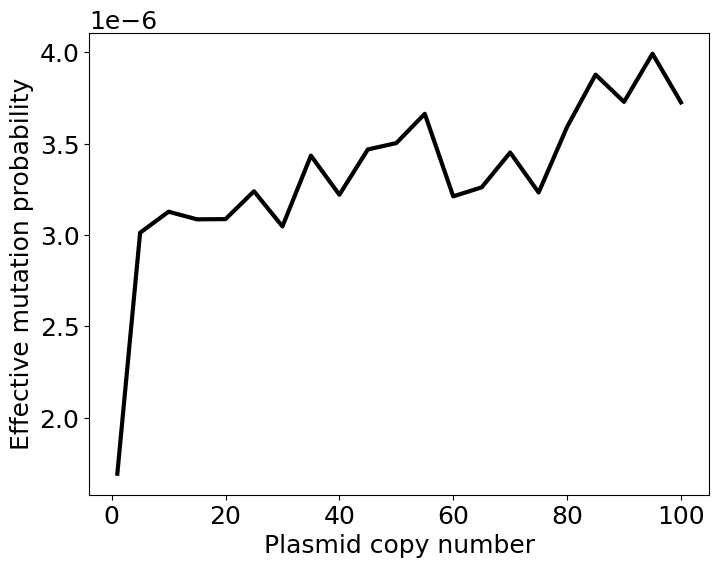

In [14]:
def plotMutPersistence(this_gens, max_plasmids, sim_results, plotSIM=''):
    """
    Aggregates and visualizes the effective mutation probabilities across different plasmid copy numbers.

    Parameters:
        this_gens: List of generation indices.
        max_plasmids: List of maximum plasmid copy numbers.
        sim_results: List of simulation results.
        plotSIM: Optional; file path to save the plot.
    """
    tot_expe = []

    final_plasmids = []
    final_muts = []
    final_all_muts = []
    final_fixed_muts = []
    final_lost_muts = []
    final_all_lost_muts = []

    # Loop over each plasmid copy number
    for iplasmid, this_max_plasmids in enumerate(max_plasmids):

        tot_generations = num_generations * num_days
        sum_muts = np.zeros((1, tot_generations))
        sum_fixed_muts = np.zeros((1, tot_generations))
        sum_new_muts = np.zeros((1, tot_generations))
        sum_ht_muts = np.zeros((1, tot_generations))
        sum_lost_muts = np.zeros((1, tot_generations))
        cum_new_muts = np.zeros((1, tot_generations))
        cum_lost_muts = np.zeros((1, tot_generations))

        nexpe = 0
        for irep in range(0, num_reps):

            # Sum mutation counts across repetitions
            sum_muts += np.array(sim_results[iplasmid][irep]['rep_count_muts'])
            sum_fixed_muts += np.array(sim_results[iplasmid][irep]['rep_count_fixed_muts'])
            sum_ht_muts = sum_muts - sum_fixed_muts
            sum_new_muts += np.hstack([0, sim_results[iplasmid][irep]['rep_count_new_muts']])
            cum_new_muts += np.hstack([0, sim_results[iplasmid][irep]['rep_cum_new_muts']])
            sum_lost_muts += np.hstack([0, sim_results[iplasmid][irep]['rep_count_lost_muts']])
            cum_lost_muts += np.hstack([0, sim_results[iplasmid][irep]['rep_cum_lost_muts']])

            nexpe += sim_results[iplasmid][irep]['nexpe']
            count_muts = sum_muts[0][-1]
            count_all_muts = cum_new_muts[0][-1]
            count_lost_muts = sum_muts[0][-1]
            count_all_lost_muts = cum_lost_muts[0][-1]
            count_fixed_muts = sum_fixed_muts[0][-1]

        final_plasmids.append(this_max_plasmids)
        final_muts.append(count_muts)
        final_fixed_muts.append(count_fixed_muts)
        final_all_muts.append(count_all_muts)
        final_lost_muts.append(count_lost_muts)
        final_all_lost_muts.append(count_all_lost_muts)

        tot_expe.append(np.sum(nexpe))

    plt.rcParams.update({'font.size': 18})
    plt.rcParams['axes.facecolor'] = 'white'
    plt.rcParams['savefig.facecolor'] = 'white'
    fig, ax = plt.subplots(figsize=(8, 6))

    print(tot_expe)
    print('final_plasmids=', final_plasmids)
    print('final_muts=', final_muts)
    print('final_fixed_muts=', final_fixed_muts)
    print('final_all_muts=', final_all_muts)
    print('final_lost_muts=', final_lost_muts)
    print('final_all_lost_muts=', final_all_lost_muts)

    # All mutations
    freq_all_mut = []
    for ifinal, this_final_mut in enumerate(final_all_muts):
        ip = (np.where(np.array(max_plasmids) == final_plasmids[ifinal]))[0]
        this_all_freq_mut = this_final_mut
        freq_all_mut.append(this_all_freq_mut)
    freq_all_mut = np.asarray(freq_all_mut)

    # Fixed mutations
    freq_fixed_mut = []
    for ifinal, this_fixed_mut in enumerate(final_fixed_muts):
        ip = (np.where(np.array(max_plasmids) == final_plasmids[ifinal]))[0]
        this_fixed_freq_mut = this_fixed_mut
        freq_fixed_mut.append(this_fixed_freq_mut)
    freq_fixed_mut = np.asarray(freq_fixed_mut)

    # Lost mutations
    freq_all_lost_mut = []
    for ifinal, this_lost_mut in enumerate(final_all_lost_muts):
        ip = (np.where(np.array(max_plasmids) == final_plasmids[ifinal]))[0]
        this_lost_freq_mut = this_lost_mut
        freq_all_lost_mut.append(this_lost_freq_mut)
    freq_all_lost_mut = np.asarray(freq_all_lost_mut)

    # Plot mean frequencies
    mean_all_freq = []
    for this_plasmid in max_plasmids:
        ip = list(np.where(np.array(final_plasmids) == this_plasmid))
        mean_all_freq.append(np.mean(freq_all_mut[list(ip[0])]))

    # Plot all lost mutations
    mean_lost_freq = []
    for this_plasmid in max_plasmids:
        ip = list(np.where(np.array(final_plasmids) == this_plasmid))
        mean_lost_freq.append(np.mean(freq_all_lost_mut[list(ip[0])]))

    ax.set_xlabel('Plasmid copy number')
    ax.set_ylabel('Effective mutation probability', color="black", fontsize=18)

    # Calculate and plot the effective mutation probability
    freq_mut = np.asarray(mean_all_freq) / np.asarray(tot_expe) / tot_generations
    mut_lost = 1 - freq_all_lost_mut / freq_all_mut
    mut_effective = np.multiply(freq_mut, mut_lost)
    plt.plot(final_plasmids, mut_effective, 'k-', lw=3)

    if plotSIM != '':
        plt.savefig(plotSIM)
        print('Exporting ' + plotSIM)

    plt.show()

# Example usage
plotSIM = dirSIM + '/MAp_pcn_effectiveMut_days' + str(num_days) + '_gens' + str(num_generations) + '_mut' + str(mut_rate) + '.png'
this_gens = range(0, num_generations * num_days)
plotMutPersistence(this_gens, max_plasmids, sim_results, plotSIM)
